In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy  as np

In [92]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv')

In [93]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome', ylabel='count'>

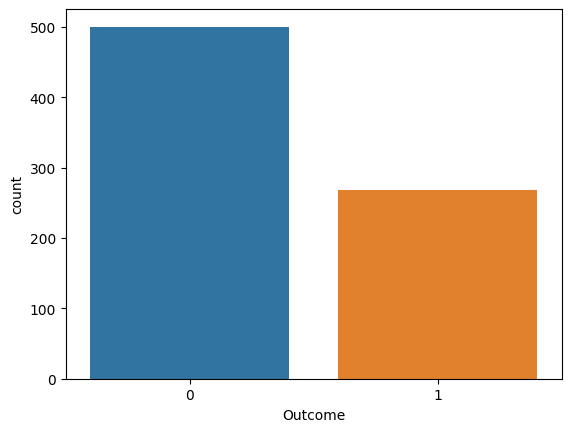

In [94]:
sns.countplot(x='Outcome',data=df)

In [95]:
# from imblearn.under_sampling import (
#     RepeatedEditedNearestNeighbours,
#     RandomUnderSampler
    
# )

-- OVerSampling


In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [98]:
X,y=df.drop(['Outcome'],axis=1),df['Outcome']
# undersampling
# us1=RandomUnderSampler()
# Xr,yr=us1.fit_resample(X,y)

In [99]:
# oversampling
smote=SMOTE()
Xr,yr=smote.fit_resample(X,y)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split                      
from sklearn.pipeline import Pipeline                                        

In [101]:
Xtrain,Xtest,ytrain,ytest=train_test_split(Xr,yr,test_size=0.2)

In [102]:
model=KNeighborsClassifier()

In [103]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier()

In [104]:
ypred=model.predict(Xtest)

              precision    recall  f1-score   support

           0       0.74      0.57      0.64       103
           1       0.63      0.78      0.70        97

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.67       200
weighted avg       0.69      0.68      0.67       200



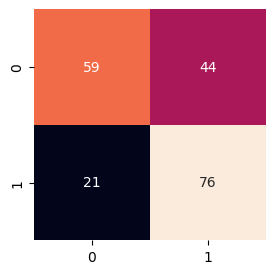

In [105]:
fig,ax=plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,ax=ax,cbar=False)
print(classification_report(ytest,ypred))


/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


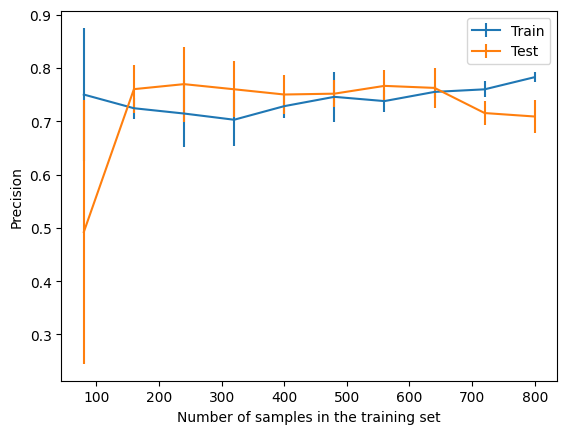

In [107]:
from sklearn.model_selection import LearningCurveDisplay

disp = LearningCurveDisplay.from_estimator(
   KNeighborsClassifier(),
    Xr,yr,
    scoring='precision',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    std_display_style='errorbar'
)